/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


lda error: 0.1, 
qda error: 0.175, 
kn error: 0.03888888888888889


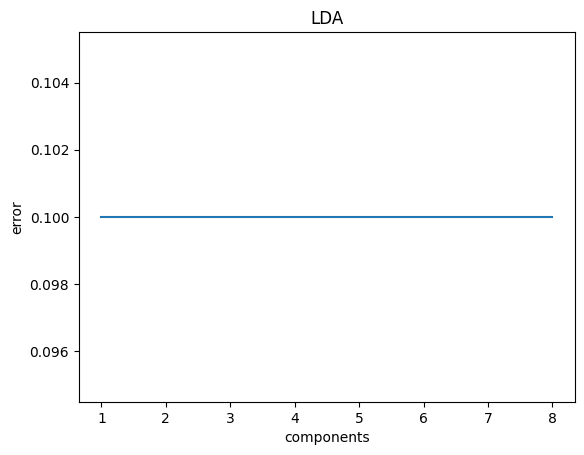

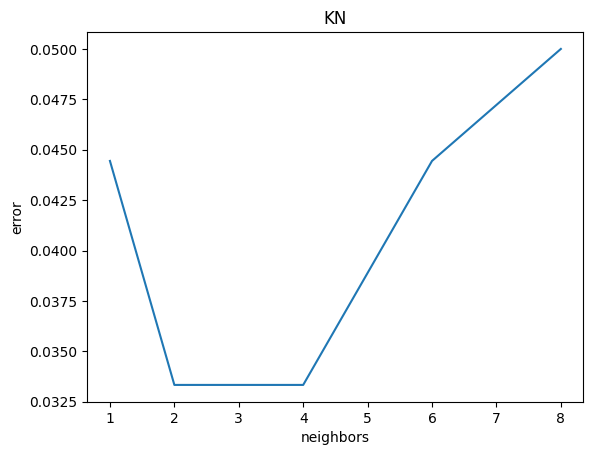

In [31]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


def error(y, y_pred):
    error = 0
    m = len(y)
    for i in range(m):
        if y[i] != y_pred[i]:
            error += 1
    return error / m


digits = load_digits()

n_train = int(digits.data.shape[0] * 0.8)
n_test = digits.data.shape[0] - n_train
y = digits.target

"""
plt.gray()
plt.matshow(digits.images[13])
print(y[13])
print(digits.data[13])
plt.show()
"""

scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(digits.data[:n_train])
test_data = scaler.transform(digits.data[n_train:])

y_train = y[:n_train]
y_test = y[n_train:]
# data = scaler.inverse_transform(scaled_data)



lda = LinearDiscriminantAnalysis()
lda.fit(train_data, y_train)
y_pred_lda = lda.predict(test_data)
lda_error = error(y_test, y_pred_lda)

qda = QuadraticDiscriminantAnalysis()
qda.fit(train_data, y_train)
y_pred_qda = qda.predict(test_data)
qda_error = error(y_test, y_pred_qda)

kn = KNeighborsClassifier()
kn.fit(train_data, y_train)
y_pred_kn = kn.predict(test_data)
kn_error = error(y_test, y_pred_kn)

print(f"lda error: {lda_error}, \nqda error: {qda_error}, \nkn error: {kn_error}")

N = [1, 2, 3, 4, 5, 6, 7, 8]
lda_error = []
kn_error = []

for n in N:
    lda = LinearDiscriminantAnalysis(n_components=n)
    lda.fit(train_data, y_train)
    y_pred = lda.predict(test_data)
    lda_error.append(error(y_test, y_pred))

    kn = KNeighborsClassifier(n_neighbors=n)
    kn.fit(train_data, y_train)
    y_pred = kn.predict(test_data)
    kn_error.append(error(y_test, y_pred))


plt.plot(N, lda_error)
plt.xlabel("components")
plt.ylabel("error")
plt.title("LDA")
plt.show()
plt.close()

plt.plot(N, kn_error)
plt.xlabel("neighbors")
plt.ylabel("error")
plt.title("KN")
plt.show()
plt.close()

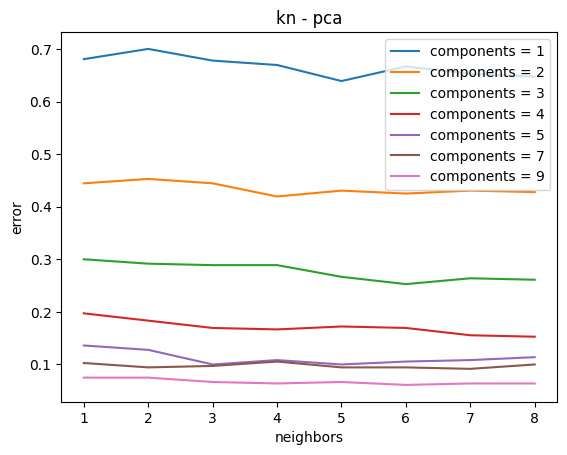

In [35]:
from sklearn.decomposition import PCA

N = [1, 2, 3, 4, 5, 6, 7, 8]
components = [1, 2, 3, 4, 5, 7, 9]
kn_error = np.zeros((len(components), len(N)))

for i in range(len(components)):
    for n in N:
        pca = PCA(n_components=components[i])
        x_train = pca.fit_transform(train_data)
        x_test = pca.transform(test_data)

        kn = KNeighborsClassifier(n_neighbors=n)
        kn.fit(x_train, y_train)
        y_pred = kn.predict(x_test)
        kn_error[i][n-1] = error(y_test, y_pred)


for i in range(len(components)):
    plt.plot(N, kn_error[i], label="components = " + str(components[i]))
    plt.xlabel("neighbors")
    plt.ylabel("error")
    plt.title("kn - pca")
    plt.legend(loc = "upper right")
plt.show()
plt.close()



By using PCA to reduce input dimensions and training KN model,
We get better results and smaller error than using only KN with same 
number of neighbors

AUC = 0.9989073426573427


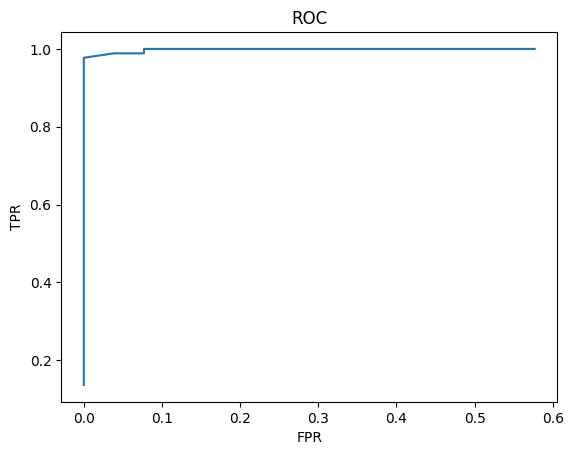

-----------------------------
threshold :  0.5
F1_score :  0.9826589595375723
TPR :  0.9659090909090909
FPR :  0.0
miss classification rate :  0.02631578947368418
precision :  1.0
-----------------------------
-----------------------------
threshold :  0.8
F1_score :  0.8344370860927153
TPR :  0.7159090909090909
FPR :  0.0
miss classification rate :  0.2192982456140351
precision :  1.0
-----------------------------
predicted =  [1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 1]
true =  [1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 1]
weights =  [-0.88508499 -1.18343614 -0.97911277 -1.2274918  -0.0884973  -0.76829573
 -1.947170

In [29]:
import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


class LogisticRegression2Class:

    def __init__(self, learning_rate=0.01, num_iterations=30000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for i in range(self.num_iterations):
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred_cls = np.zeros((X.shape[0], 2))
        y_pred_cls[:, 0] = 1 - y_pred
        y_pred_cls[:, 1] = y_pred
        return y_pred_cls

    def ROC(self, y, y_pred):
        m = 100
        sensitivity = np.zeros((m, 1))
        selectivity = np.zeros((m, 1))
        threshold = min(y_pred)
        d = (max(y_pred) - min(y_pred)) / (m + 1)

        for i in range(m):
            threshold += d
            TPs = 0
            TNs = 0
            Ps = 0
            Ns = 0
            for k in range(len(y)):
                if y[k] == 1:
                    Ps += 1
                    if y_pred[k] > threshold:
                        TPs += 1
                else:
                    Ns += 1
                    if y_pred[k] < threshold:
                        TNs += 1

            sensitivity[i] = TPs / Ps
            selectivity[i] = TNs / Ns

        return 1 - selectivity, sensitivity


def metrics(y, y_pred, threshold):
    TPs = 0
    TNs = 0
    FPs = 0
    FNs = 0
    Ps = 0
    Ns = 0
    for k in range(len(y)):
        if y[k] == 1:
            Ps += 1
            if y_pred[k] > threshold:
                TPs += 1
            else:
                FNs += 1
        else:
            Ns += 1
            if y_pred[k] < threshold:
                TNs += 1
            else:
                FPs += 1

    TPR = TPs / Ps
    FPR = 1 - TNs / Ns
    accuracy = (TPs + TNs)/(Ps + Ns)
    precision = TPs / (TPs + FPs)
    miss_classification_rate = 1 - accuracy
    F1_score = 2 * precision * TPR / (precision + TPR)

    print("-----------------------------")
    print("threshold : ", threshold)
    print("F1_score : ", F1_score)
    print("TPR : ", TPR)
    print("FPR : ", FPR)
    print("miss classification rate : ", miss_classification_rate)
    print("precision : ", precision)
    print("-----------------------------")
    return F1_score, TPR, FPR, miss_classification_rate, precision


data = load_breast_cancer()
data_df = pd.DataFrame(data=data.data,
                       columns=data.feature_names)
data_df = data_df.head().T

n_train = int(data.data.shape[0] * 0.8)

y = data.target
y_train = y[:n_train]
y_test = y[n_train:]

train_data = data.data[:n_train]
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(data.data[n_train:])

LR = LogisticRegression2Class()
LR.fit(train_data, y_train)
y_pred = LR.predict(test_data)

FP, TP = LR.ROC(y_test, y_pred[:, 1])
AUC = 1 - sklearn.metrics.auc(FP, 1-TP)
threshold_1 = 0.5
threshold_2 = 0.8
print(f"AUC = {AUC}")

plt.plot(FP, TP)
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
plt.close()

metrics(y_test, y_pred[:, 1], threshold_1)
metrics(y_test, y_pred[:, 1], threshold_2)

threshold = 0.5
y_pred = [int(x + threshold) for x in y_pred[:, 1]]
print("predicted = ", y_pred - y_test + y_test)
print("true = ", y_test)
print("weights = ", LR.weights)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


AUC =  nan


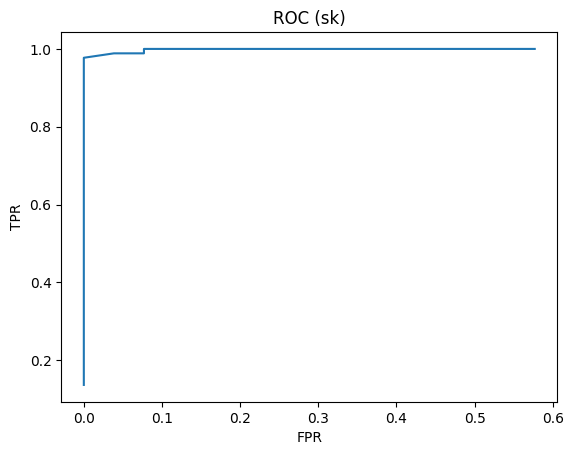

-----------------------------
threshold :  0.5
F1_score :  0.983050847457627
TPR :  0.9886363636363636
miss classification rate :  0.02631578947368418
precision :  0.9775280898876404
-----------------------------
-----------------------------
threshold :  0.8
F1_score :  0.8571428571428571
TPR :  0.75
miss classification rate :  0.19298245614035092
precision :  1.0
-----------------------------
predicted =  [1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 1]
true =  [1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 1]
weights =  [[-1.62284003 -1.93638901 -1.59779616 -1.36595351 -0.87873886 -0.40014678
  -1.14871413 -1.82049414 -0.2

In [30]:
clf = LogisticRegression(random_state=0).fit(train_data, y_train)
probs = clf.predict_proba(test_data)

fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, probs[:, 1], pos_label=2)
print("AUC = ", sklearn.metrics.auc(fpr, tpr))

plt.plot(FP, TP)
plt.title("ROC (sk)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
plt.close()

threshold_1 = 0.5
threshold_2 = 0.8

y_pred1 = (probs[:, 1] > threshold_1).astype(int)
y_pred2 = (probs[:, 1] > threshold_2).astype(int)

print("-----------------------------")
print("threshold : ", threshold_1)
print("F1_score : ", sklearn.metrics.f1_score(y_test, y_pred1))
print("TPR : ", sklearn.metrics.recall_score(y_test, y_pred1))
print("miss classification rate : ", 1 - sklearn.metrics.accuracy_score(y_test, y_pred1))
print("precision : ", sklearn.metrics.precision_score(y_test, y_pred1))
print("-----------------------------")

print("-----------------------------")
print("threshold : ", threshold_2)
print("F1_score : ", sklearn.metrics.f1_score(y_test, y_pred2))
print("TPR : ", sklearn.metrics.recall_score(y_test, y_pred2))
print("miss classification rate : ", 1 - sklearn.metrics.accuracy_score(y_test, y_pred2))
print("precision : ", sklearn.metrics.precision_score(y_test, y_pred2))
print("-----------------------------")


print("predicted = ", y_pred1)
print("true = ", y_test)
print("weights = ", clf.coef_)



Both models have similar ROC and AUC.

Our model has a higher precision but less f1-score, TPR and error rate